Всевидящее око начальства увидело, что вы прошли еще одну ступень в постижении глубин ООП языка Python - наследование. Вас вновь решили испытать и посмотреть, на что вы действительно способны. Тимлид (Teamleader) с широкой улыбкой протянул вам следующее задание.

# Техническое задание


Обязательно: Документирование методов (классов по желанию), Аннотации типов.

Необходимо написать универсальную основу для представления ненаправленных связных графов и поиска в них кратчайших маршрутов. Далее, этот алгоритм предполагается применять для прокладки маршрутов: на картах, в метро и так далее.

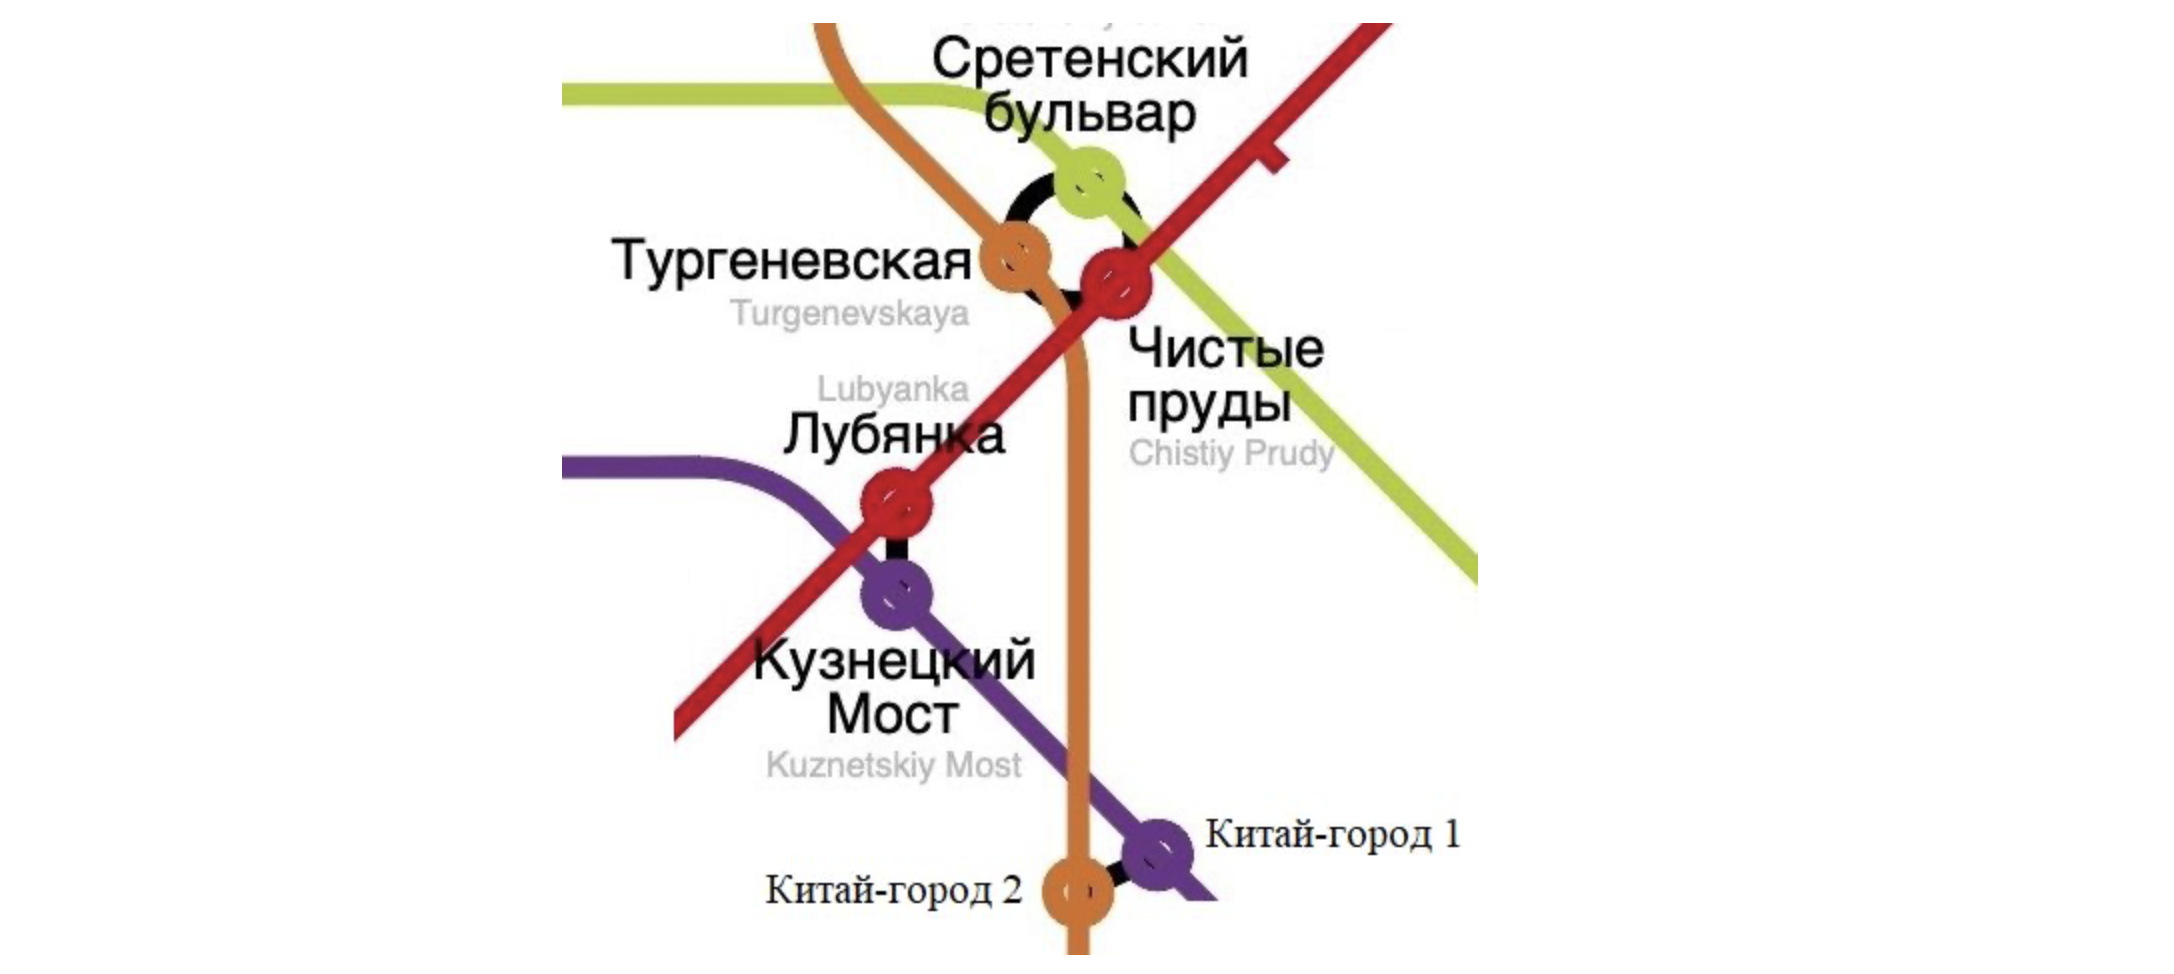

Для универсального описания графов, вам требуется объявить в программе следующие классы:

**Vertex** - для представления вершин графа (на карте это могут быть: здания, остановки, достопримечательности и т.п.);
**Link** - для описания связи между двумя произвольными вершинами графа (на карте: маршруты, время в пути и т.п.);
**LinkedGraph** - для представления связного графа в целом (карта целиком).

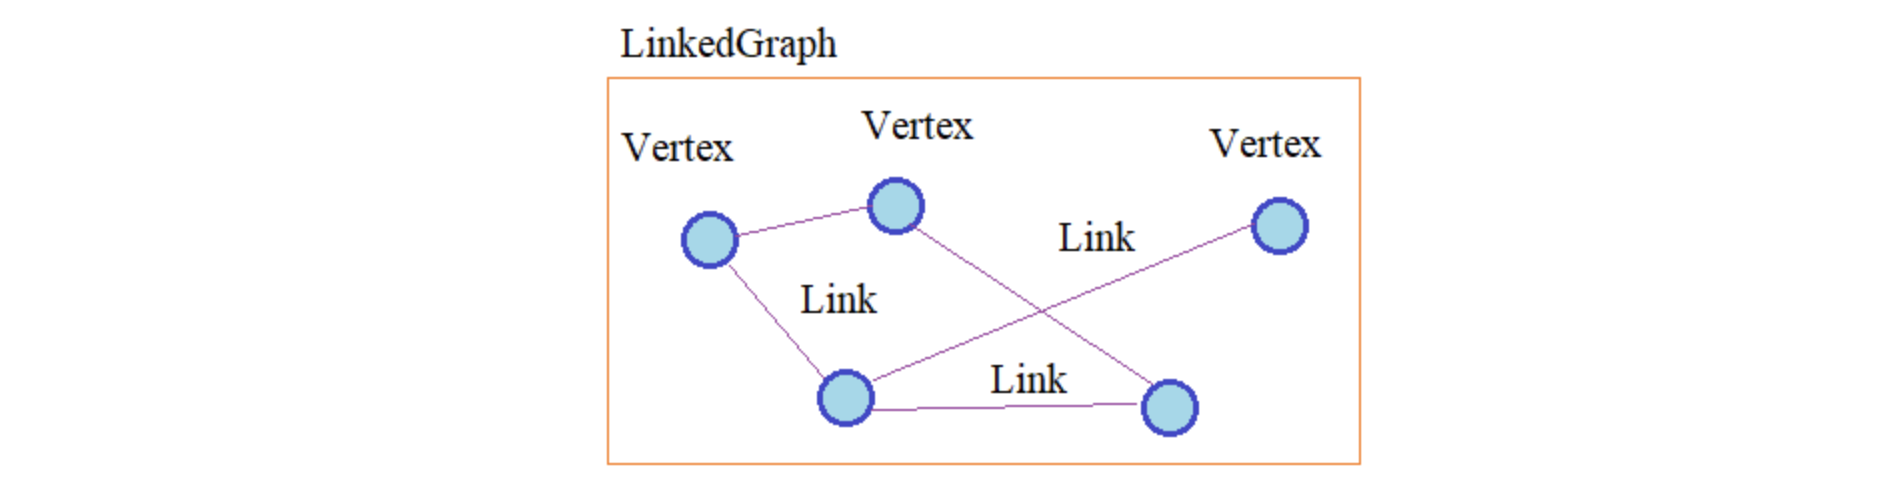

Объекты класса **Vertex** должны создаваться командой:
```Py
v = Vertex()
```
и содержать локальный атрибут:

_links - список связей с другими вершинами графа (список объектов класса Link).

Также в этом классе должно быть объект-свойство (property):

links - для получения ссылки на список _links.



Объекты следующего класса **Link** должны создаваться командой:
```Py
link = Link(v1, v2)
```
где v1, v2 - объекты класса Vertex (вершины графа). Внутри каждого объекта класса Link должны формироваться следующие локальные атрибуты:

_v1, _v2 - ссылки на объекты класса Vertex, которые соединяются данной связью;

_dist - длина связи (по умолчанию 1); это может быть длина пути, время в пути и др.

В классе Link должны быть объявлены следующие объекты-свойства:

v1 - для получения ссылки на вершину v1;

v2 - для получения ссылки на вершину v2;

dist - для изменения и считывания значения атрибута _dist.

Наконец, объекты третьего класса **LinkedGraph** должны создаваться командой:
```Py
map_graph = LinkedGraph()
```

В каждом объекте класса LinkedGraph должны формироваться локальные атрибуты:

_links - список из всех связей графа (из объектов класса Link);

_vertex - список из всех вершин графа (из объектов класса Vertex).



В самом классе LinkedGraph необходимо объявить (как минимум) следующие методы:

def add_vertex(self, v): ... - для добавления новой вершины v в список _vertex (если она там отсутствует);

def add_link(self, link): ... - для добавления новой связи link в список _links (если объект link с указанными вершинами в списке отсутствует);

def find_path(self, start_v, stop_v): ... - для поиска кратчайшего маршрута из вершины start_v в вершину stop_v.

Метод find_path() должен возвращать список из вершин кратчайшего маршрута и список из связей этого же маршрута в виде кортежа: 

([вершины кратчайшего пути], [связи между вершинами])

Поиск кратчайшего маршрута необходимо реализовать через алгоритм Дейкстры поиска кратчайшего пути в связном взвешенном графе.

В методе add_link() при добавлении новой связи следует автоматически добавлять вершины этой связи в список _vertex, если они там отсутствуют.

Проверку наличия связи в списке _links следует определять по вершинам этой связи. Например, если в списке имеется объект:

_links = [Link(v1, v2)]

то добавлять в него новые объекты Link(v2, v1) или Link(v1, v2) нельзя (обратите внимание у всех трех объектов будут разные id, т.е. по id определять вхождение в список нельзя).

**Подсказка**: проверку на наличие существующей связи можно выполнить с использованием функции filter() и указанием нужного условия для отбора объектов.

Пример использования классов, применительно к схеме метро (эти строчки в программе писать не нужно):

```Py
map_graph = LinkedGraph()

v1 = Vertex()
v2 = Vertex()
v3 = Vertex()
v4 = Vertex()
v5 = Vertex()
v6 = Vertex()
v7 = Vertex()

map_graph.add_link(Link(v1, v2))
map_graph.add_link(Link(v2, v3))
map_graph.add_link(Link(v1, v3))

map_graph.add_link(Link(v4, v5))
map_graph.add_link(Link(v6, v7))

map_graph.add_link(Link(v2, v7))
map_graph.add_link(Link(v3, v4))
map_graph.add_link(Link(v5, v6))

print(len(map_graph._links))   # 8 связей
print(len(map_graph._vertex))  # 7 вершин
path = map_graph.find_path(v1, v6)
```

Однако, в таком виде применять классы для схемы карты метро не очень удобно. Например, здесь нет указаний названий станций, а также длина каждого сегмента равна 1, что не соответствует действительности.

Чтобы поправить этот момент и реализовать программу поиска кратчайшего пути в метро между двумя произвольными станциями, объявите еще два дочерних класса:

class **Station**(Vertex): ... - для описания станций метро;

class **LinkMetro**(Link): ... - для описания связей между станциями метро.

Объекты класса **Station** должны создаваться командой:
```Py
st = Station(name)
```
где name - название станции (строка). В каждом объекте класса Station должен дополнительно формироваться локальный атрибут:

name - название станции метро.

(Не забудьте в инициализаторе дочернего класса вызывать инициализатор базового класса).

В самом классе Station переопределите магические методы __str__() и __repr__(), чтобы они возвращали название станции метро (локальный атрибут name).

Объекты второго класса LinkMetro должны создаваться командой:
```Py
link = LinkMetro(v1, v2, dist)
```
где v1, v2 - вершины (станции метро); dist - расстояние между станциями (любое положительное число).

(Также не забывайте в инициализаторе этого дочернего класса вызывать инициализатор базового класса).

В результате, эти классы должны совместно работать следующим образом (эти строчки в программе писать не нужно):

```Py
map_metro = LinkedGraph()
v1 = Station("Сретенский бульвар")
v2 = Station("Тургеневская")
v3 = Station("Чистые пруды")
v4 = Station("Лубянка")
v5 = Station("Кузнецкий мост")
v6 = Station("Китай-город 1")
v7 = Station("Китай-город 2")

map_metro.add_link(LinkMetro(v1, v2, 1))
map_metro.add_link(LinkMetro(v2, v3, 1))
map_metro.add_link(LinkMetro(v1, v3, 1))

map_metro.add_link(LinkMetro(v4, v5, 1))
map_metro.add_link(LinkMetro(v6, v7, 1))

map_metro.add_link(LinkMetro(v2, v7, 5))
map_metro.add_link(LinkMetro(v3, v4, 3))
map_metro.add_link(LinkMetro(v5, v6, 3))

print(len(map_metro._links))
print(len(map_metro._vertex))
path = map_metro.find_path(v1, v6)  # от сретенского бульвара до китай-город 1
print(path[0])    # [Сретенский бульвар, Тургеневская, Китай-город 2, Китай-город 1]
print(sum([x.dist for x in path[1]]))  # 7
```

P.S. В программе нужно объявить только классы Vertex, Link, LinkedGraph, Station, LinkMetro. На экран ничего выводить не нужно.

In [21]:
class Vertex:
    def __init__(self):
        self._links = []
        
    @property
    def links(self):
        return self._links

class Link:
    def __init__(self, v1, v2, dist=1):
        self._v1 = v1
        self._v2 = v2
        self._dist = dist

    @property
    def v1(self):
        return self._v1
        
    @property
    def v2(self):
        return self._v2
    
    @property
    def dist(self):
        return self._dist
    
    @dist.setter
    def dist(self, val):
        self._dist = val

class Station(Vertex):
  def __init__(self, name):
    super().__init__()
    self.name = name


class LinkMetro(Link):
  def __init__(self, v1, v2, dist=1):
    super().__init__(v1, v2, dist)

class LinkedGraph:
    def __init__(self):
        self._links = []
        self._vertex = []
    
    def add_vertex(self, v):
        if v not in self._vertex:
            self._vertex.append(v)

    
    def add_link(self, link: Link):
        out_links = list(filter(lambda out_link: 
        (link.v1 == out_link.v1 and link.v2 == out_link.v2) or
        (link.v1 == out_link.v2 and link.v2 == out_link.v1), 
        self._links))
        if not out_links:
            self._links.append(link)
            link.v1.links.append(link)
            link.v2.links.append(link)
        if link.v1 not in self._vertex:
            self._vertex.append(link.v1)
        if link.v2 not in self._vertex:
            self._vertex.append(link.v2)
    
    def _find_lowest_cost(self, costs, processed):
        lowest_cost = float('inf')
        lowest_cost_node = None
        for node in costs:
            cost = costs[node]
            if cost < lowest_cost and node not in processed:
                lowest_cost = cost
                lowest_cost_node = node
        return lowest_cost_node
    
    def find_path(self, start_v, stop_v):
        costs = {v: float('inf') for v in self._vertex}
        costs[start_v] = 0
        parents = {v: None for v in self._vertex}
        processed = set()
        
        node = start_v
        while node is not None:
            cost = costs[node]
            neighbors = node.links  
            for link in neighbors:
                neighbor = link.v2
                new_cost = cost + link.dist
                if new_cost < costs[neighbor]:
                    costs[neighbor] = new_cost
                    parents[neighbor] = node
            processed.add(node)
            node = self._find_lowest_cost(costs, processed)  
        
        links = []
        vertex = []
        while stop_v:
            if isinstance(stop_v, Station):
                vertex.append(stop_v.name)
            else:
                vertex.append(stop_v)
            parent = parents[stop_v]
            if parent:
                for link in parent.links:
                    if link.v2 is stop_v:  
                        links.append(link)  
            stop_v = parent  
            if stop_v is None:
                break
        
        cout = '['
        for v in vertex[::-1]:
            if isinstance(v, str):
                cout += v + ', '

        return cout[:-2] + ']', links[::-1]

# Тесты

In [22]:
# ```Py
map2 = LinkedGraph()
v1 = Vertex()
v2 = Vertex()
v3 = Vertex()
v4 = Vertex()
v5 = Vertex()
map2.add_link(Link(v1, v2))
map2.add_link(Link(v2, v3))
map2.add_link(Link(v2, v4))
map2.add_link(Link(v3, v4))
map2.add_link(Link(v4, v5))
assert len(map2._links) == 5, "неверное число связей в списке _links класса LinkedGraph"
assert len(map2._vertex) == 5, "неверное число вершин в списке _vertex класса LinkedGraph"
map2.add_link(Link(v2, v1))
assert len(map2._links) == 5, "метод add_link() добавил связь Link(v2, v1), хотя уже имеется связь Link(v1, v2)"
path = map2.find_path(v1, v5)
s = sum([x.dist for x in path[1]])
assert s == 3, "неверная суммарная длина маршрута, возможно, некорректно работает объект-свойство dist"
assert issubclass(Station, Vertex) and issubclass(LinkMetro, Link), "класс Station должен наследоваться от класса Vertex, а класс LinkMetro от класса Link"
map2 = LinkedGraph()
v1 = Station("1")
v2 = Station("2")
v3 = Station("3")
v4 = Station("4")
v5 = Station("5")
map2.add_link(LinkMetro(v1, v2, 1))
map2.add_link(LinkMetro(v2, v3, 2))
map2.add_link(LinkMetro(v2, v4, 7))
map2.add_link(LinkMetro(v3, v4, 3))
map2.add_link(LinkMetro(v4, v5, 1))
assert len(map2._links) == 5, "неверное число связей в списке _links класса LinkedGraph"
assert len(map2._vertex) == 5, "неверное число вершин в списке _vertex класса LinkedGraph"
path = map2.find_path(v1, v5)
assert str(path[0]) == '[1, 2, 3, 4, 5]', path[0]
s = sum([x.dist for x in path[1]])
assert s == 7, "неверная суммарная длина маршрута для карты метро"
# ```